<a href="https://colab.research.google.com/github/Ziadnasser1/Deep-Learning-Training/blob/main/ComputerVision/Alex_Net_Architecture_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models


import matplotlib.pyplot as plt


In [45]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [46]:
x_train.shape

(50000, 32, 32, 3)

In [47]:
x_test.shape

(10000, 32, 32, 3)

In [48]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [49]:
model = models.Sequential()

model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(x_train, y_train, epochs=12, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.1769 - loss: 2.1047 - val_accuracy: 0.2780 - val_loss: 1.8247
Epoch 2/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3150 - loss: 1.7713 - val_accuracy: 0.3934 - val_loss: 1.6169
Epoch 3/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3927 - loss: 1.6178 - val_accuracy: 0.4490 - val_loss: 1.5059
Epoch 4/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4444 - loss: 1.5169 - val_accuracy: 0.4722 - val_loss: 1.4548
Epoch 5/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4764 - loss: 1.4465 - val_accuracy: 0.4728 - val_loss: 1.4559
Epoch 6/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4982 - loss: 1.3960 - val_accuracy: 0.4756 - val_loss: 1.4492
Epoch 7/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5156 - loss: 1.3470 - val_accuracy: 0.4752 - val_loss: 1.4489
Epoch 8/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5339 - loss: 1.2973 - val_

In [52]:
print("Model Summary:")
model.summary()

Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 96)            │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 256)           │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 2, 2, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 2, 2, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 2, 2, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,866,464 (247.45 MB)

 Trainable params: 21,622,154 (82.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 43,244,310 (164.96 MB)

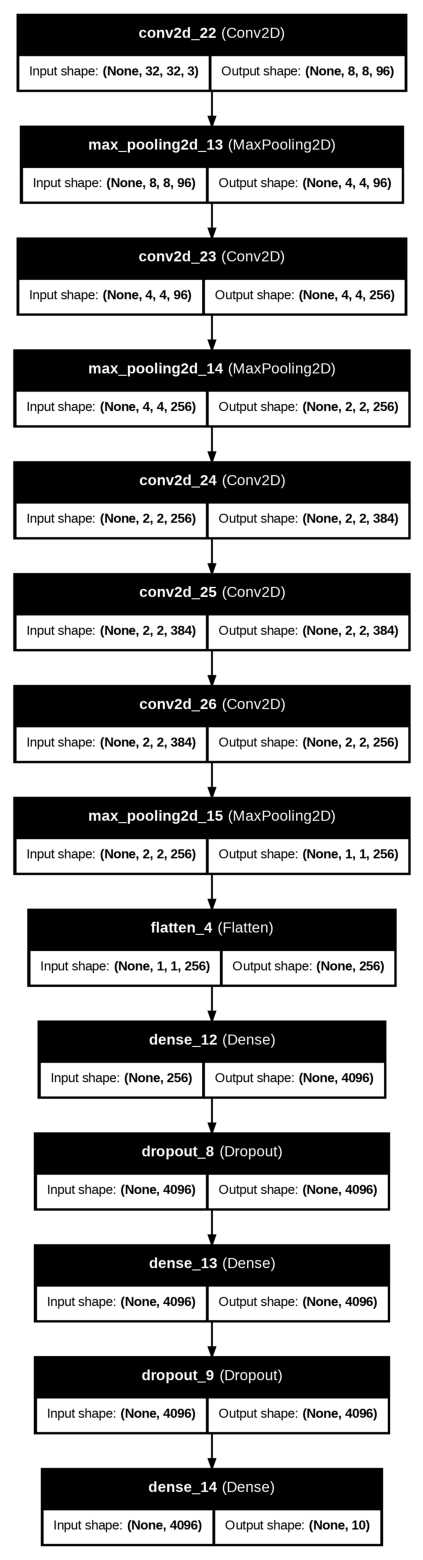

In [53]:


# Plot the model architecture
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='alexnet_model.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('alexnet_model.png')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

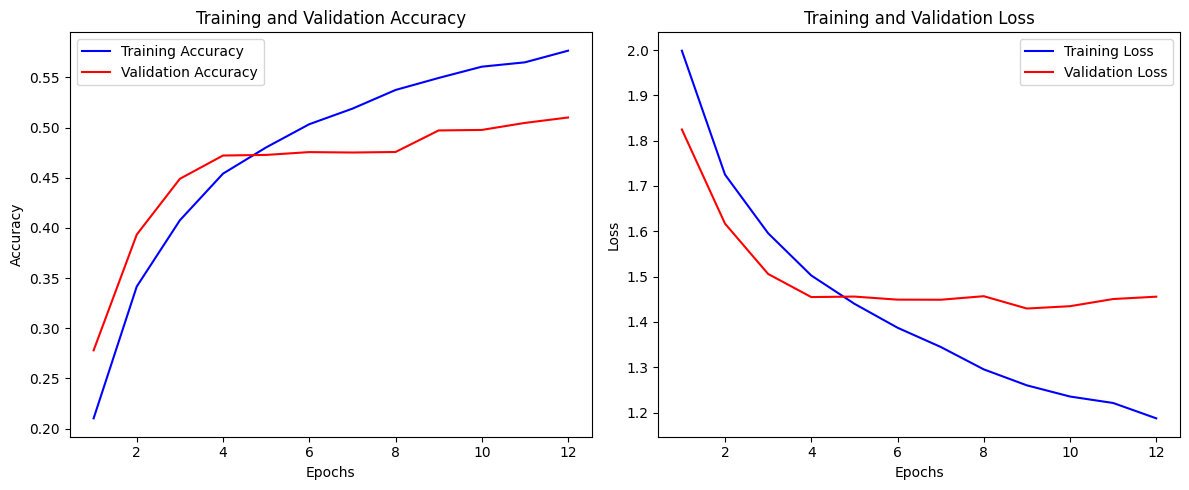

In [55]:
epochs = range(1, len(history.history['accuracy']) + 1)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()